<a href="https://colab.research.google.com/github/brrikcy/deep-learning/blob/main/DL_EXP_06_Stacked_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# Encoder for the first autoencoder
encoder1 = Model(input_img1, encoded1)
encoded_train1 = encoder1.predict(x_train)
encoded_test1 = encoder1.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Define the second autoencoder with CNN layers
input_img2 = Input(shape=(14, 14, 32))
x2 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img2)
x2 = MaxPooling2D((2, 2), padding='same')(x2)
encoded2 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
x2 = UpSampling2D((2, 2))(encoded2)
decoded2 = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x2)

autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder2.fit(encoded_train1, encoded_train1, epochs=10, batch_size=256, shuffle=True, validation_data=(encoded_test1, encoded_test1))

# Encoder for the second autoencoder

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: -834.2206 - val_loss: -19539.9980
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: -48281.0352 - val_loss: -205663.2031
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: -305607.1562 - val_loss: -723784.5625
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: -923287.0625 - val_loss: -1699133.8750
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: -2020575.2500 - val_loss: -3227083.7500
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: -3676048.0000 - val_loss: -5382375.0000
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: -5994223.5000 - val_loss: -8221641.0000
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: -8985660.0000 - val_loss: -11794017.0000
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: -12701112.0000 - val_loss: -16138325.0000
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: -17216204.0000 - val_loss: -21286024.0000


In [ ]:
# Encoder for the second autoencoder
encoder2 = Model(input_img2, encoded2)
encoded_train2 = encoder2.predict(encoded_train1)
encoded_test2 = encoder2.predict(encoded_test1)

In [ ]:
# Flatten encoded data for classification
x_train_encoded = np.reshape(encoded_train2, (len(encoded_train2), -1))
x_test_encoded = np.reshape(encoded_test2, (len(encoded_test2), -1))


In [ ]:
# Prepare the labels for classification
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Define the classifier on top of the encoded representations
classification_input = Input(shape=(7*7*16,))
x = Dense(64, activation='relu')(classification_input)
x = Dense(32, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

classifier = Model(classification_input, output)
classifier.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(x_train_encoded, y_train_cat, epochs=10, batch_size=256, validation_data=(x_test_encoded, y_test_cat))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1425 - loss: 77563.9609 - val_accuracy: 0.2313 - val_loss: 3189.7512
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2441 - loss: 3624.8591 - val_accuracy: 0.1221 - val_loss: 5732.5103
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2399 - loss: 4264.2056 - val_accuracy: 0.2281 - val_loss: 3207.4883
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2478 - loss: 4544.7065 - val_accuracy: 0.3064 - val_loss: 1991.4771
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2868 - loss: 2544.3186 - val_accuracy: 0.3728 - val_loss: 1014.2619
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3149 - loss: 1948.6998 - val_accuracy: 0.3115 - val_loss: 1660.5006
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3252 - loss: 1784.5065 - val_accuracy: 0.3109 - val_loss: 2023.3446
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

In [ ]:
# Evaluate the classifier
test_loss, test_acc = classifier.evaluate(x_test_encoded, y_test_cat)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3573 - loss: 580.2487
Test accuracy: 0.3637999892234802


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


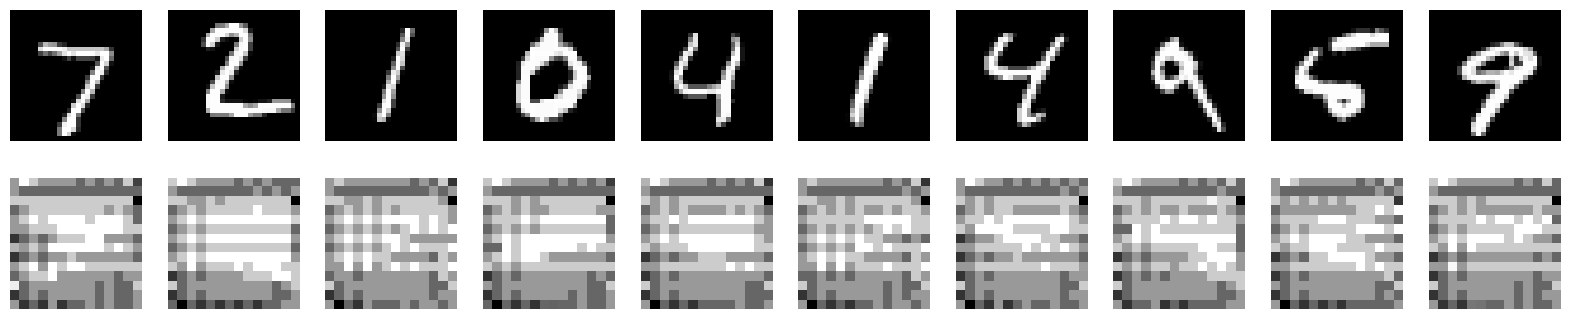

In [ ]:
# Visualize some reconstructed images using the complete stacked autoencoder
input_stacked = Input(shape=(28, 28, 1))
encoded1_stacked = encoder1(input_stacked)
decoded_stacked = autoencoder2(encoded1_stacked)
stacked_autoencoder = Model(input_stacked, decoded_stacked)

decoded_imgs = stacked_autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    # Reshape to 14x14x32 and then take the mean across the last dimension (32) for visualization
    plt.imshow(decoded_imgs[i].reshape(14, 14, 32).mean(axis=-1), cmap='gray')
    plt.axis('off')
plt.show()